# Hole Testbilder

In [1]:
from urllib.request import urlretrieve

In [2]:
import cv2

fnames = ["haus01.jpg", "haus02.jpg", "haus03.jpg"]
          
imgs = []    

for fname in fnames:
    url = f"http://www.juergenbrauer.org/datasets/{fname}"    
    urlretrieve( url, fname )
    img = cv2.imread(fname)    
    print( f"{fname} --> Auflösung ist {img.shape} ", end="")
    
    w = int(img.shape[1] * 0.20)
    h = int(img.shape[0] * 0.20)
    img_resized = cv2.resize(img,(w,h))
    print( f"und jetzt: {img_resized.shape}" )
    
    #img_resized_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img_resized_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)     
        
    imgs.append(img_resized_gray)

haus01.jpg --> Auflösung ist (3024, 3024, 3) und jetzt: (604, 604, 3)
haus02.jpg --> Auflösung ist (4032, 2268, 3) und jetzt: (806, 453, 3)
haus03.jpg --> Auflösung ist (3130, 2348, 3) und jetzt: (626, 469, 3)


In [3]:
type(imgs[0])

numpy.ndarray

In [4]:
imgs[0].shape

(604, 604)

# Bilder anzeigen + Filtern

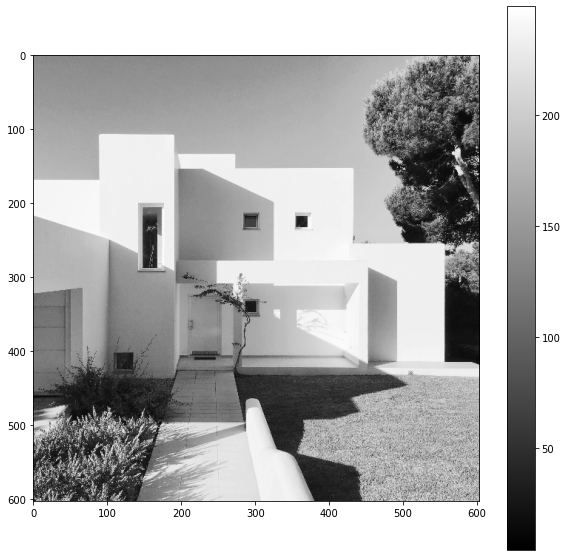

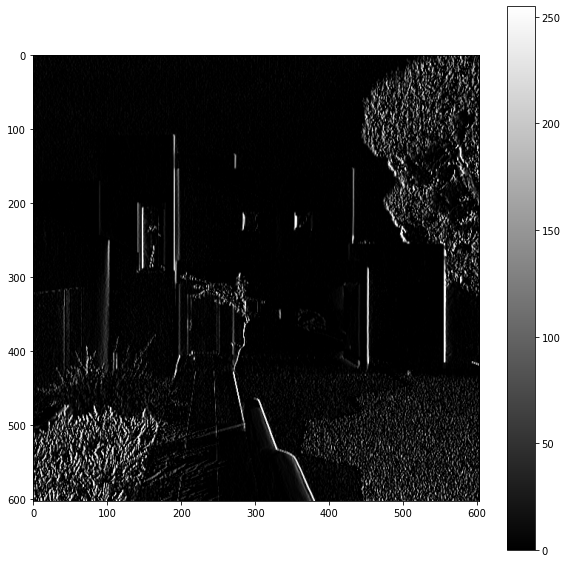

In [5]:
import matplotlib.pyplot as plt

import numpy as np
filter=2
if filter == 1:
    F = np.array( [[1,1,1],
                   [0,0,0],
                   [-1,-1,-1]] )
elif filter == 2:
    F = np.array( [[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]] )

img = imgs[0]
plt.figure(figsize=(10,10))
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()

R = cv2.filter2D(img, -1, F)
plt.figure(figsize=(10,10))
plt.imshow(R, cmap="gray")
plt.colorbar()
plt.show()

# Histogramm der Werte

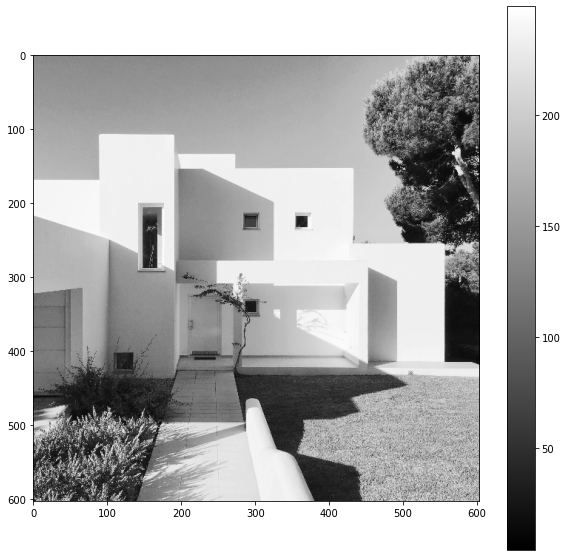

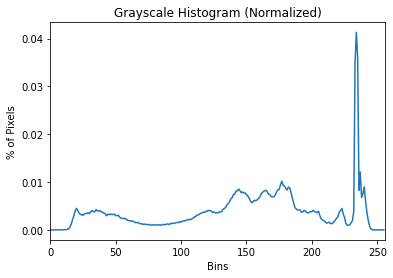

In [14]:
img = imgs[0]
plt.figure(figsize=(10,10))
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()

# compute a grayscale histogram
# see:
# https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/
# cv2.calcHist(images, channels, mask, histSizes, ranges)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist = hist.flatten()

# normalize the histogram
hist /= hist.sum()
# plot the normalized histogram
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [8]:
type(hist)

numpy.ndarray

In [9]:
hist.shape

(256, 1)

# Frequenztransformation

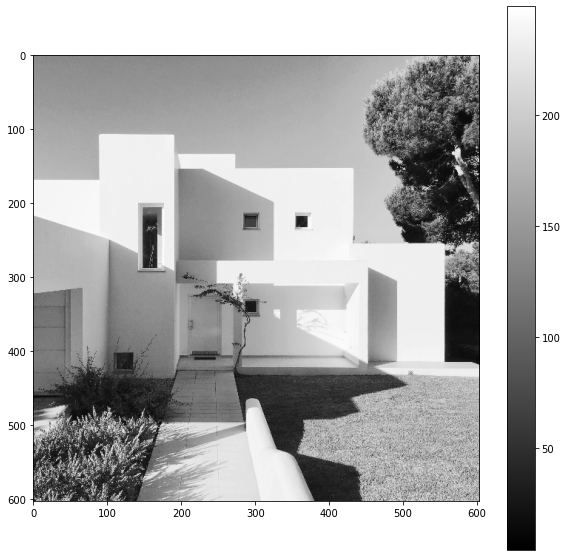

In [53]:
import cv2
import numpy

img = imgs[0]
plt.figure(figsize=(10,10))
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.show()

# convert the grayscale to float32
imf = numpy.float32(img)

# find discrete cosine transform
freqs = cv2.dct(imf, cv2.DCT_INVERSE)

In [54]:
freqs

array([[ 9.2329555e+04, -9.3051752e+02, -7.9799956e+03, ...,
        -7.4647746e+00,  1.1072965e+01,  1.9885101e+01],
       [ 6.4739546e+03,  1.1784900e+04, -2.9765232e+03, ...,
         1.0795476e+01, -4.7947555e+00,  1.5589639e+01],
       [-6.2590044e+03, -6.3246692e+02, -6.3803247e+02, ...,
         1.8379508e+00, -1.6934927e+00, -2.3384405e+01],
       ...,
       [ 5.3976505e+01,  2.8438454e+01,  1.1163053e+01, ...,
        -7.4477863e+00, -3.4561656e+00, -1.1553265e+01],
       [-1.1731256e+01, -5.3304596e+00, -8.0109138e+00, ...,
        -4.4994038e-01,  1.2581454e+01, -3.7810134e-04],
       [ 7.2126427e+01, -4.3187702e+01,  1.0921106e+01, ...,
        -9.1101539e-01, -4.3293061e+00,  7.8394759e-01]], dtype=float32)

In [55]:
img.shape

(604, 604)

In [56]:
freqs.shape

(604, 604)

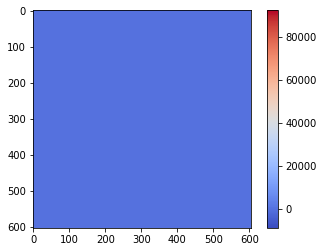

In [57]:
plt.imshow(freqs, cmap="coolwarm")
plt.colorbar()
plt.show()

In [58]:
freqs.min()

-8959.9375

In [59]:
freqs.max()

92329.555

In [60]:
freqs.shape

(604, 604)

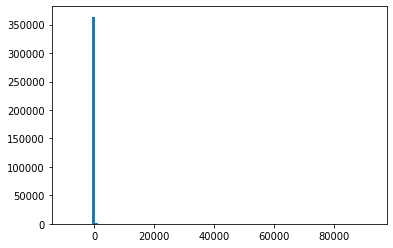

In [61]:
plt.hist(freqs.flatten(), bins=100)
plt.show()

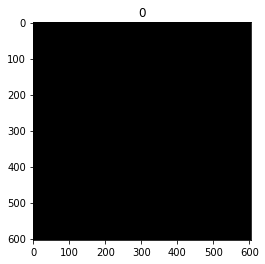

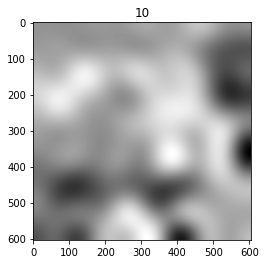

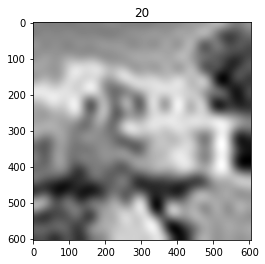

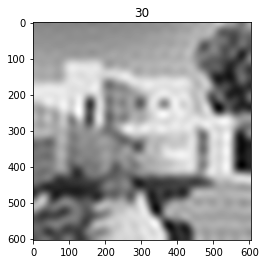

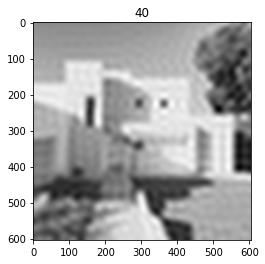

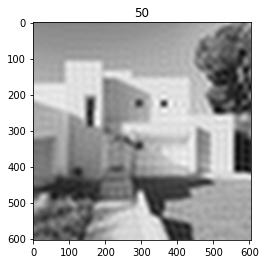

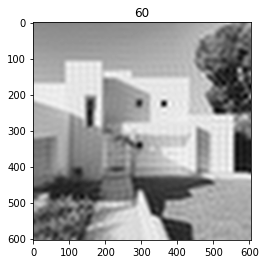

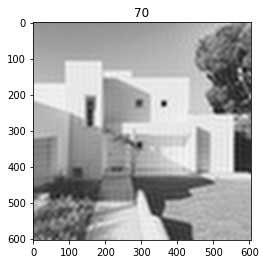

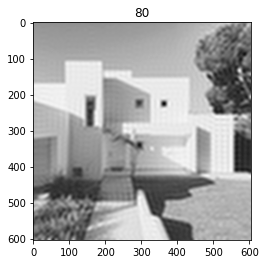

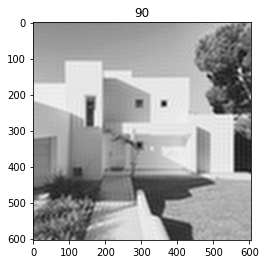

In [66]:
for N in range(0,100,10):

    freqs2 = numpy.zeros( freqs.shape )    
    freqs2[0:N,0:N] = freqs[0:N,0:N]

    # apply inverse discrete cosine transform
    img2 = cv2.idct(freqs2)

    plt.imshow(img2, cmap="gray")
    plt.title(N)
    plt.show()